In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
full_df = pd.read_csv("../data/index/full.csv")
train_df = pd.read_csv("../data/index/train.csv")
val_df = pd.read_csv("../data/index/val.csv")
test_df = pd.read_csv("../data/index/test.csv")

# Check that the full dataframe is the union of the train, validation, and test dataframes
assert len(full_df) == len(train_df) + len(val_df) + len(test_df)
assert len(full_df) == len(pd.concat([train_df, val_df, test_df]).drop_duplicates())

# Check that the train, validation, and test dataframes are disjoint
assert len(train_df) == len(train_df.drop_duplicates())
assert len(val_df) == len(val_df.drop_duplicates())
assert len(test_df) == len(test_df.drop_duplicates())
assert len(pd.concat([train_df, val_df, test_df]).drop_duplicates()) == len(full_df)


In [4]:
# Join the train, validation, and test dataframes into one dataframe with a column indicating the split
train_df["split"] = "train"
val_df["split"] = "val"
test_df["split"] = "test"
df = pd.concat([train_df, val_df, test_df])

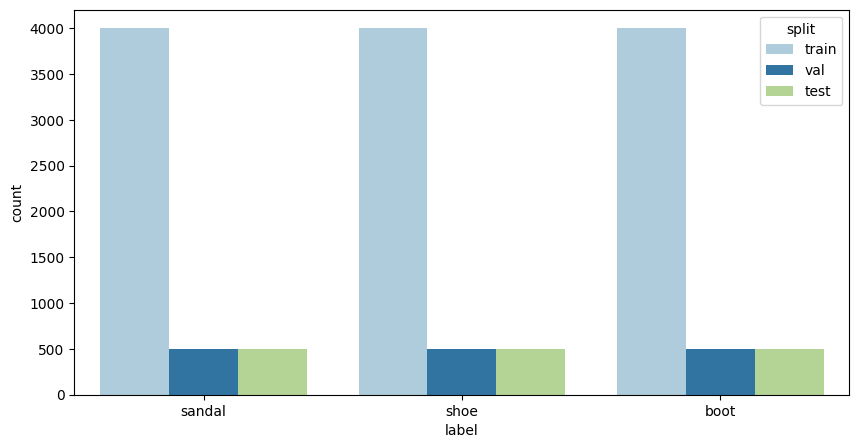

In [5]:
# Plot the distribution of labels in the train, validation, and test dataframes grouped by split
plt.figure(figsize=(10, 5))
sns.countplot(x="label", hue="split", data=df, palette="Paired")
plt.show()